## Importing dependencies 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x157b1995890>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Non Survived'),
  Text(0.42826367051652175, -1.1209773541493675, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.249820474467971, -0.6539034565871309, '38.4%')])

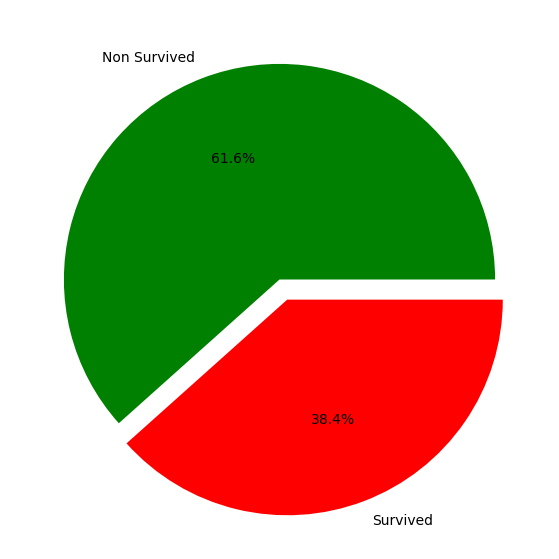

In [5]:
plt.figure(figsize=(13,7))
sizes=titanic_data["Survived"].value_counts().values
labels=["Non Survived","Survived"]
color=["Green","Red"]
explode=[0,.1]
plt.pie(sizes,explode,labels,color,autopct='%1.1f%%')

<Axes: xlabel='Embarked', ylabel='count'>

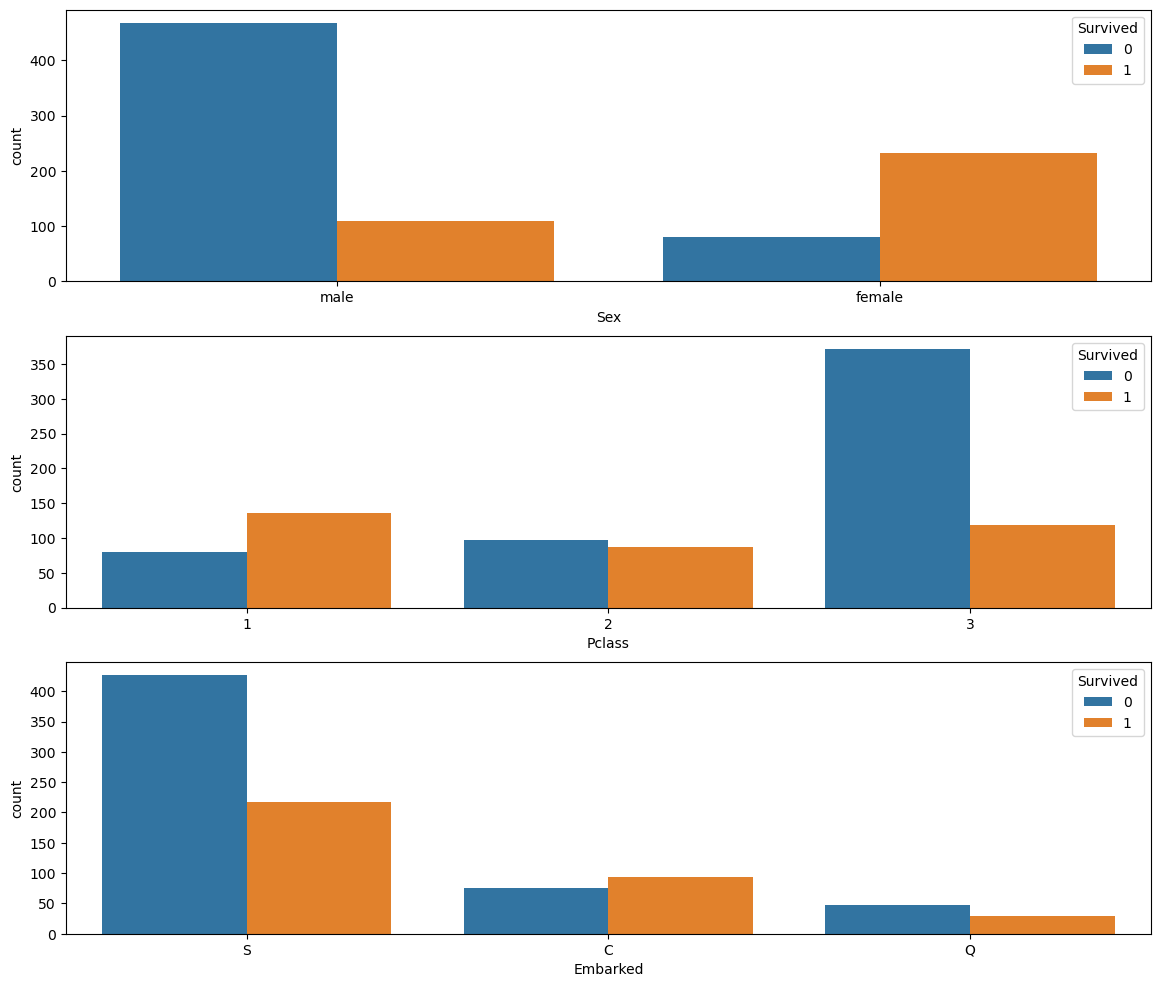

In [6]:
fig,ax=plt.subplots(3,1,figsize=(14,12))
sns.countplot(x="Sex",hue="Survived",data=titanic_data,ax=ax[0])
sns.countplot(x='Pclass',hue="Survived",data=titanic_data,ax=ax[1])

sns.countplot(x="Embarked",hue="Survived",data=titanic_data,ax=ax[2])


### Handling the missing values:

In [7]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [8]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [9]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Transformation into a categorical column

In [11]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [12]:
# dropping  few columns, which are not of much importance 

In [13]:
titanic_data= titanic_data.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

### Split the data into the target and feature variables.

In [14]:
X = titanic_data.drop("Survived",axis=1)
Y = titanic_data['Survived']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

### Logistic Regression

In [16]:
model = LogisticRegression()
model

LogisticRegression()

In [17]:
model.fit(X_train, Y_train)

LogisticRegression()

In [18]:
# Checking the Accuracy

In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score: ', training_data_accuracy)

Accuracy score:  0.8075842696629213


In [20]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score: ', test_data_accuracy)

Accuracy score:  0.7821229050279329


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
input_data = (3,0,35,0,0,8.05,0)

In [23]:
input_data_np = np.asarray(input_data)

In [24]:
reshaped = input_data_np.reshape(1,-1)

In [25]:
#Now, Let’s predict using our model:

prediction = model.predict(reshaped)
#print(prediction)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Dead
